In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!pip install lazypredict


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/multiscale_entropy/c2f_calculated_entropy/permute_data.csv',header=None)

In [3]:
import numpy as np
y = df[df.shape[1]-1].values
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

df=df.T.fillna(df.mean(axis=1)).T


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
1137,0.69231,0.69276,0.69286,0.69276,0.69311,0.69212,0.69256,0.69262,0.69298,0.69313,...,0.69291,0.69295,0.69291,0.69315,0.62224,0.69295,0.69310,0.69293,0.69290,2.0
1138,0.69315,0.69314,0.69309,0.69311,0.69308,0.69315,0.69315,0.69314,0.69311,0.69312,...,0.69312,0.69311,0.69308,0.69297,-0.00000,0.69313,0.69306,0.69314,0.69314,2.0
1139,0.69191,0.69192,0.69160,0.69148,0.69146,0.69181,0.69186,0.69196,0.69159,0.69142,...,0.69215,0.69212,0.69211,0.69225,0.69113,0.69188,0.69194,0.69186,0.69214,2.0
1140,0.67317,0.67330,0.67475,0.67487,0.67487,0.67362,0.67310,0.67323,0.67475,0.67512,...,0.67632,0.67456,0.67475,0.67549,-0.00000,0.67444,0.67463,0.67450,0.67438,2.0
1141,0.69173,0.69181,0.69197,0.69169,0.69179,0.69157,0.69171,0.69178,0.69179,0.69186,...,0.69227,0.69169,0.69171,0.69196,-0.00000,0.69144,0.69167,0.69166,0.69162,2.0


In [4]:

cols_to_scale = list(df.columns)[:-1]
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [7]:
df.shape

(1142, 191)

In [5]:
X = df.drop([df.shape[1]-1], axis=1)


In [9]:
X.shape

(1142, 190)

In [10]:
from collections import Counter
print(Counter(y))

Counter({2: 626, 1: 516})


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,logreg.predict(X_test)))

0.8209606986899564
              precision    recall  f1-score   support

           1       0.74      0.94      0.83       104
           2       0.94      0.72      0.81       125

    accuracy                           0.82       229
   macro avg       0.84      0.83      0.82       229
weighted avg       0.85      0.82      0.82       229



svm

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8209606986899564

In [15]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           1       0.73      0.96      0.83       104
           2       0.96      0.70      0.81       125

    accuracy                           0.82       229
   macro avg       0.84      0.83      0.82       229
weighted avg       0.85      0.82      0.82       229



# New Section

In [16]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''


et = ExtraTreesClassifier(n_jobs = -1, random_state = seed)
ab = AdaBoostClassifier(random_state = seed)
gb = GradientBoostingClassifier(random_state = seed)
xgb = XGBClassifier(random_state = seed, n_jobs = -1)
lgb = LGBMClassifier(random_state = seed, n_jobs = -1)

knn = KNeighborsClassifier(3)
lsvm = SVC(kernel="linear", C=0.025)
rsvm = SVC(kernel="rbf",gamma=2, C=1)
gps = GaussianProcessClassifier(1.0 * RBF(1.0))
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
mlp = MLPClassifier(alpha=1, max_iter=1000)
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

In [17]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    model.fit(X_train, Y_train)
    return model.score(X_test,Y_test)
'''Calculate train_test_split score of differnt models and plot them.'''
models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
train_test_split_res = []
for model in models:
    train_test_split_res.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_res, columns = ['Train_Test_SCORE'])
train_test_score.index = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']
train_test_score = train_test_score.round(5)
train_test_score

,Train_Test_SCORE
ET,0.83406
AB,0.80786
GB,0.81659
XGB,0.81659
LGB,0.83843
KNN,0.78166
LSVM,0.67686
RSVM,0.80786
GPS,0.82969
DT,0.72489


In [18]:
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    score = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = 'accuracy')
    return score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (ACC)'])
x_val_score.index = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']

In [19]:
x_val_score

,Cross Validation Scores (ACC)
ET,0.770740
AB,0.745202
GB,0.748741
XGB,0.754050
LGB,0.769741
KNN,0.702479
LSVM,0.656148
RSVM,0.719908
GPS,0.753997
DT,0.653364


In [20]:
'''Create a function to plot learning curves.'''
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'accuracy', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

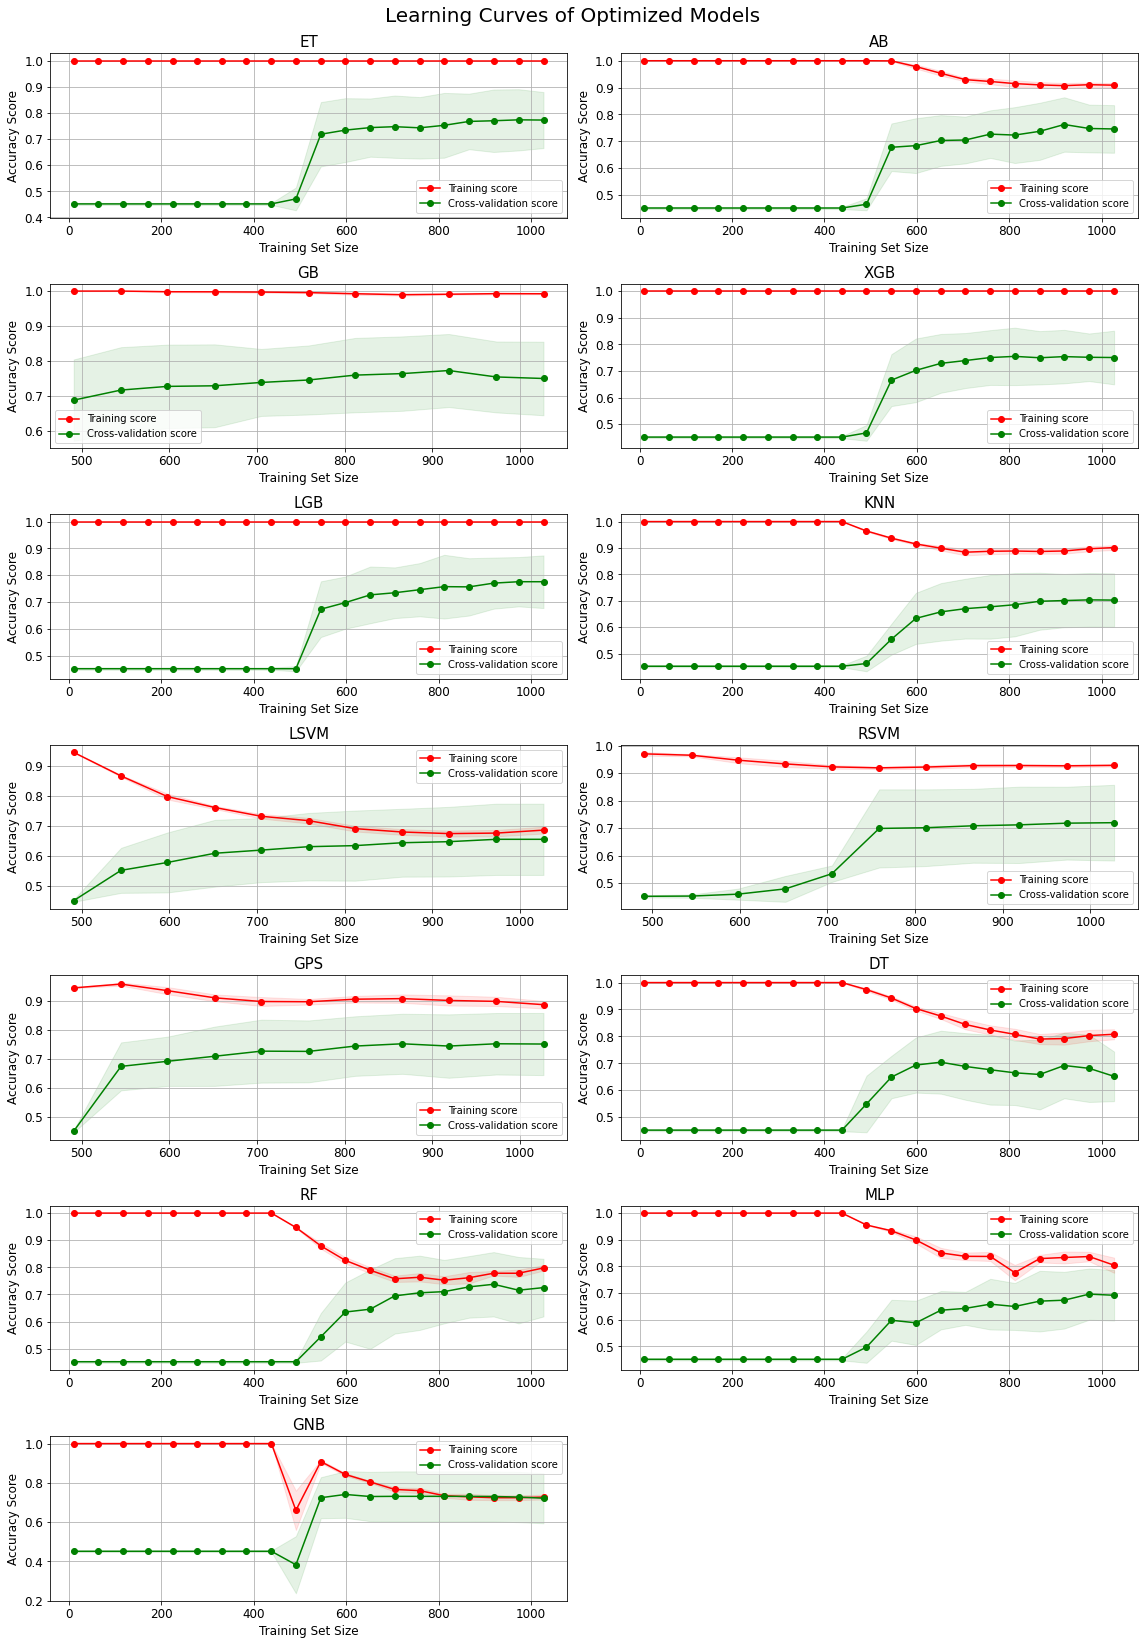

In [21]:
'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,24))
lc_models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
lc_labels = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']

for ax, models, labels in zip (range(1,14), lc_models, lc_labels):
    try:
        plt.subplot(7,2,ax)
        plot_learning_curve(models)
        plt.title(labels, fontsize = 15)
    except:
        pass
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# XGB

In [8]:
import xgboost as xgb
# read in data
'''
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]
# specify parameters via map
param = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.01,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'eval_metric':'auc',
         'skip_drop': 0.5}
num_round = 500
bst = xgb.train(param, dtrain, num_round,evallist)
preds = bst.predict(dtest)
'''

"\ndtrain = xgb.DMatrix(X_train,y_train)\ndtest = xgb.DMatrix(X_test,y_test)\nevallist = [(dtest, 'eval'), (dtrain, 'train')]\n# specify parameters via map\nparam = {'booster': 'dart',\n         'max_depth': 5, 'learning_rate': 0.01,\n         'objective': 'binary:logistic',\n         'sample_type': 'uniform',\n         'normalize_type': 'tree',\n         'rate_drop': 0.1,\n         'eval_metric':'auc',\n         'skip_drop': 0.5}\nnum_round = 500\nbst = xgb.train(param, dtrain, num_round,evallist)\npreds = bst.predict(dtest)\n"

In [9]:
#xgb.plot_importance(bst)

In [10]:
param = {'booster': 'dart',
         'max_depth': 5,
         'learning_rate': 0.001,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5,
         'n_estimators':2000}

[0]	validation_0-logloss:0.69268	validation_0-auc:0.87825	validation_1-logloss:0.69273	validation_1-auc:0.82642
[1]	validation_0-logloss:0.69222	validation_0-auc:0.87658	validation_1-logloss:0.69231	validation_1-auc:0.82912
[2]	validation_0-logloss:0.69175	validation_0-auc:0.87663	validation_1-logloss:0.69191	validation_1-auc:0.82300
[3]	validation_0-logloss:0.69129	validation_0-auc:0.87480	validation_1-logloss:0.69150	validation_1-auc:0.82869
[4]	validation_0-logloss:0.69083	validation_0-auc:0.87604	validation_1-logloss:0.69108	validation_1-auc:0.82861
[5]	validation_0-logloss:0.69037	validation_0-auc:0.87605	validation_1-logloss:0.69067	validation_1-auc:0.82861
[6]	validation_0-logloss:0.68991	validation_0-auc:0.87607	validation_1-logloss:0.69025	validation_1-auc:0.82888
[7]	validation_0-logloss:0.68946	validation_0-auc:0.87489	validation_1-logloss:0.68985	validation_1-auc:0.82888
[8]	validation_0-logloss:0.68900	validation_0-auc:0.87491	validation_1-logloss:0.68944	validation_1-auc:

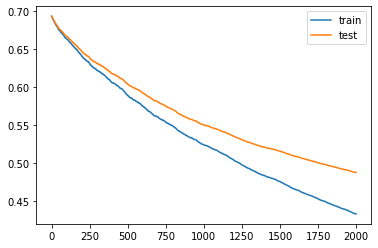

In [11]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier(**param)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric=['logloss','auc'], eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

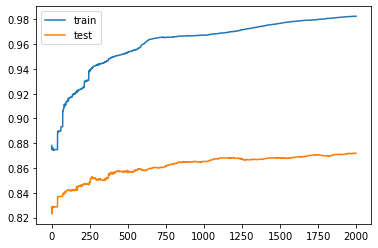

In [12]:
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [15]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.71      0.96      0.82       104
           2       0.95      0.67      0.79       125

    accuracy                           0.80       229
   macro avg       0.83      0.82      0.80       229
weighted avg       0.84      0.80      0.80       229



In [16]:
print(confusion_matrix(y_test,model.predict(X_test)))

[[100   4]
 [ 41  84]]


# Lazy

In [17]:
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric =None)
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
#print(models)

100%|██████████| 29/29 [00:06<00:00,  4.60it/s]


In [18]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.85,0.85,0.85,0.85,0.60
NuSVC,0.83,0.84,0.84,0.83,0.30
BaggingClassifier,0.83,0.84,0.84,0.83,0.48
RandomForestClassifier,0.82,0.83,0.83,0.82,0.58
ExtraTreesClassifier,0.82,0.83,0.83,0.82,0.33
AdaBoostClassifier,0.83,0.83,0.83,0.83,0.60
LogisticRegression,0.82,0.83,0.83,0.82,0.09
SGDClassifier,0.83,0.82,0.82,0.82,0.06
KNeighborsClassifier,0.82,0.82,0.82,0.82,0.11


In [19]:
type(predictions)

pandas.core.frame.DataFrame